# Pack Stats

In [1]:
#import pymc3 as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
packs_raw = pd.read_csv('./1.09/MEA_Patch_1_09.csv')
packs_raw.head()

,Date,Pack,Price,Common (C/W),Uncommon (C/W),Rare Mod,Rare Weap.,Rare Char.,UR Weap.,UR Char.,1 Level booster,2 Level booster,3 Level booster,4 Level booster,N. Consumbales
0,2017-07-06,Basic,5000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
1,2017-07-06,Basic,5000.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
2,2017-07-06,Advanced,20000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
3,2017-07-06,Basic,5000.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
4,2017-07-06,Basic,5000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0


In [3]:
list(packs_raw)

['Date',
 'Pack',
 'Price',
 'Common (C/W)',
 'Uncommon (C/W)',
 'Rare Mod',
 'Rare Weap.',
 'Rare Char.',
 'UR Weap.',
 'UR Char.',
 '1 Level booster',
 '2 Level booster',
 '3 Level booster',
 '4 Level booster',
 'N. Consumbales']

In [4]:
packs_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 15 columns):
Date               70 non-null object
Pack               70 non-null object
Price              70 non-null float64
Common (C/W)       70 non-null float64
Uncommon (C/W)     70 non-null float64
Rare Mod           70 non-null float64
Rare Weap.         70 non-null float64
Rare Char.         70 non-null float64
UR Weap.           70 non-null float64
UR Char.           70 non-null float64
1 Level booster    70 non-null float64
2 Level booster    70 non-null float64
3 Level booster    70 non-null float64
4 Level booster    70 non-null float64
N. Consumbales     70 non-null float64
dtypes: float64(13), object(2)
memory usage: 8.3+ KB


In [5]:
packs_raw_1_10 = pd.read_csv('./1.10/MEA_Patch_1_10.csv')

In [6]:
packs_raw_1_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619 entries, 0 to 618
Data columns (total 15 columns):
Date               619 non-null object
Pack               619 non-null object
Price              610 non-null float64
Common (C/W)       619 non-null float64
Uncommon (C/W)     619 non-null float64
Rare Mod           619 non-null float64
Rare Weap.         619 non-null float64
Rare Char.         619 non-null float64
UR Weap.           619 non-null float64
UR Char.           619 non-null float64
1 Level booster    619 non-null float64
2 Level booster    619 non-null float64
3 Level booster    619 non-null float64
4 Level booster    619 non-null float64
N. Consumbales     619 non-null float64
dtypes: float64(13), object(2)
memory usage: 72.6+ KB


In [7]:
packs_raw_1_10 = packs_raw_1_10[pd.notnull(packs_raw_1_10['Price'])]

In [8]:
packs_raw = packs_raw.append(packs_raw_1_10)

In [9]:
packs_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680 entries, 0 to 618
Data columns (total 15 columns):
Date               680 non-null object
Pack               680 non-null object
Price              680 non-null float64
Common (C/W)       680 non-null float64
Uncommon (C/W)     680 non-null float64
Rare Mod           680 non-null float64
Rare Weap.         680 non-null float64
Rare Char.         680 non-null float64
UR Weap.           680 non-null float64
UR Char.           680 non-null float64
1 Level booster    680 non-null float64
2 Level booster    680 non-null float64
3 Level booster    680 non-null float64
4 Level booster    680 non-null float64
N. Consumbales     680 non-null float64
dtypes: float64(13), object(2)
memory usage: 85.0+ KB


In [10]:
packs_raw['Pack'].value_counts()

Advanced          104
Jumbo Supply      102
Reserves           99
Arsenal            80
Ammo Priming       64
Supply             61
Premium            55
Technical Mods     43
Expert             32
Basic              31
Jumbo Premium       5
Apex Elite          4
Name: Pack, dtype: int64

In [11]:
packs_raw['Price'].value_counts()

100000.0    234
10000.0     166
20000.0     147
2000.0       61
50000.0      32
5000.0       31
500000.0      5
0.0           3
600000.0      1
Name: Price, dtype: int64

In [12]:
packs_raw['Pack'][packs_raw['Price'] == 0]

5     Apex Elite
35    Apex Elite
91    Apex Elite
Name: Pack, dtype: object

In [13]:
packs_raw = packs_raw[packs_raw['Price'] > 0.]

In [14]:
packs_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 677 entries, 0 to 618
Data columns (total 15 columns):
Date               677 non-null object
Pack               677 non-null object
Price              677 non-null float64
Common (C/W)       677 non-null float64
Uncommon (C/W)     677 non-null float64
Rare Mod           677 non-null float64
Rare Weap.         677 non-null float64
Rare Char.         677 non-null float64
UR Weap.           677 non-null float64
UR Char.           677 non-null float64
1 Level booster    677 non-null float64
2 Level booster    677 non-null float64
3 Level booster    677 non-null float64
4 Level booster    677 non-null float64
N. Consumbales     677 non-null float64
dtypes: float64(13), object(2)
memory usage: 84.6+ KB


In [15]:
packs_raw['Pack'].value_counts()

Advanced          104
Jumbo Supply      102
Reserves           99
Arsenal            80
Ammo Priming       64
Supply             61
Premium            55
Technical Mods     43
Expert             32
Basic              31
Jumbo Premium       5
Apex Elite          1
Name: Pack, dtype: int64

In [16]:
n_premium = 0
prem_types = ['Arsenal', 'Reserves', 'Premium']
for b in prem_types:
    n_premium += len(packs_raw[packs_raw['Pack'] == b])
print('Number of "premium tier" packs =', n_premium)

prem_idx = packs_raw['Pack'] == prem_types[0]
for i in range(1, len(prem_types)):
    prem_idx |= packs_raw['Pack'] == prem_types[i]

n_ur_weap = np.sum(packs_raw[prem_idx]['UR Weap.']).astype(np.int64)
print('Number of UR weapons =', n_ur_weap)

n_ur_char = np.sum(packs_raw[prem_idx]['UR Char.']).astype(np.int64)
print('Number of UR characters =', n_ur_char)

n_ur_tot = n_ur_weap + n_ur_char
print('Number of total URs =', n_ur_tot)

n_ur_boost = np.sum(packs_raw[prem_idx]['4 Level booster']).astype(np.int64)
print('Number of UR boosters =', n_ur_boost)

Number of "premium tier" packs = 234
Number of UR weapons = 34
Number of UR characters = 28
Number of total URs = 62
Number of UR boosters = 60


Suppose the probability of a UR character is twice that of a UR weapon over this mix of packs...

(array([3.000e+00, 3.400e+01, 1.720e+02, 7.610e+02, 2.094e+03, 3.129e+03,
        2.527e+03, 1.049e+03, 2.150e+02, 1.600e+01]),
 array([25. , 27.9, 30.8, 33.7, 36.6, 39.5, 42.4, 45.3, 48.2, 51.1, 54. ]),
 <a list of 10 Patch objects>)

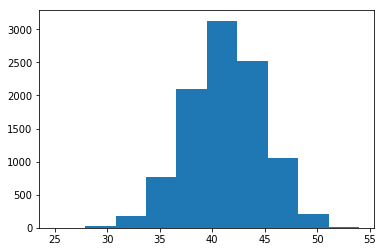

In [17]:
p_c = 0.666
p_w = 1.0 - p_c
C = stats.binom(n=n_ur_tot, p=p_c)
data = C.rvs(10000)
plt.hist(data)

In [18]:
n_ur_tot / n_premium

0.26495726495726496

In [19]:
n_expert = len(packs_raw[packs_raw['Pack'] == 'Expert'])
print('Expert packs:', n_expert)

expert_idx = packs_raw['Pack'] == 'Expert'

n_ur_weap_ex = np.sum(packs_raw[expert_idx]['UR Weap.'])
print('Number of UR weapons =', n_ur_weap_ex)

n_ur_char_ex = np.sum(packs_raw[expert_idx]['UR Char.'])
print('Number of UR characters =', n_ur_char_ex)

n_ur_tot_ex = n_ur_weap_ex + n_ur_char_ex
print('Number of total URs =', n_ur_tot_ex)

n_ur_boost_ex = np.sum(packs_raw[expert_idx]['4 Level booster'])
print('Number of UR boosters =', n_ur_boost_ex)

print('UR fraction = %f' % (n_ur_tot_ex / n_expert))

Expert packs: 32
Number of UR weapons = 1.0
Number of UR characters = 2.0
Number of total URs = 3.0
Number of UR boosters = 6.0
UR fraction = 0.093750


In [20]:
pricing_raw = packs_raw.copy()

In [21]:
type(pricing_raw)

pandas.core.frame.DataFrame

In [22]:
rems = ['Date', 'Notes', 'Variant present', 'Ultra Rares']
rems = []
for col in rems:
    try:
        pricing_raw.drop(columns=[col], inplace=True)
    except ValueError:
        print('{} was missing'.format(col))
        
print(list(pricing_raw))

['Date', 'Pack', 'Price', 'Common (C/W)', 'Uncommon (C/W)', 'Rare Mod', 'Rare Weap.', 'Rare Char.', 'UR Weap.', 'UR Char.', '1 Level booster', '2 Level booster', '3 Level booster', '4 Level booster', 'N. Consumbales']


In [23]:
pricing_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 677 entries, 0 to 618
Data columns (total 15 columns):
Date               677 non-null object
Pack               677 non-null object
Price              677 non-null float64
Common (C/W)       677 non-null float64
Uncommon (C/W)     677 non-null float64
Rare Mod           677 non-null float64
Rare Weap.         677 non-null float64
Rare Char.         677 non-null float64
UR Weap.           677 non-null float64
UR Char.           677 non-null float64
1 Level booster    677 non-null float64
2 Level booster    677 non-null float64
3 Level booster    677 non-null float64
4 Level booster    677 non-null float64
N. Consumbales     677 non-null float64
dtypes: float64(13), object(2)
memory usage: 84.6+ KB
